In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Simul import get_m1_m2,get_RQ_MOA,get_R_simul,get_RQ_MOA2,get_R_simul_wf,get_R_simul_wf2

In [81]:
np.pi/2

1.5707963267948966

In [130]:
alpha = 0
beta = 0.2
eta1 = 0.1
eta2 = 0.0
shift = 0
N = 500

In [134]:
t_end = 10000
R1,R2,Q1,Q2,t = get_RQ_MOA(1,0.6,alpha=alpha,beta=beta,eta1=eta1,eta2=eta2,shift=shift,t_end=t_end)
R1_2,R2_2,Q1_2,Q2_2,_ = get_RQ_MOA2(1,0.6,alpha=alpha,beta=beta,eta1=eta1,eta2=eta2,shift=shift,t_end=t_end)
R1_s,R2_s,Q1_s,Q2_s,t = get_R_simul_wf2(1.,0.6,N,alpha=alpha,beta=beta,eta1=eta1,eta2=eta2,shift=shift,t_end=t_end)

(0.0, 8000.0)

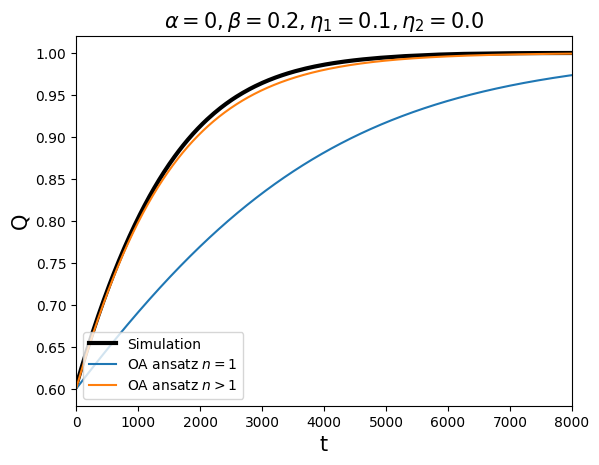

In [136]:
plt.plot(t,Q2_s,label='Simulation',color='black',lw=3,zorder=0)
plt.plot(t,Q2,label=r'OA ansatz $n=1$')
plt.plot(t,Q2_2,label='OA ansatz $n>1$')

# plt.plot(t,(Q2s + Q2s2)/2,label='modified OA ansatz 1')
# plt.plot(t,,label='modified OA ansatz 2')
plt.legend(loc=3)
plt.ylabel('Q',fontsize=15)
plt.xlabel('t',fontsize=15)
# for a in nums:
    # plt.plot(t_,Q2_S[a])
plt.title(rf'$\alpha={alpha},\beta={beta},\eta_1 = {eta1},\eta_2 = {eta2}$',fontsize=15)
plt.xlim(0,8000)
# plt.ylim(0.5,1.05)

(array([9863., 1993., 1290., 1992., 9862., 9862., 1992., 1290., 1993.,
        9863.]),
 array([-3.14159265, -2.51327412, -1.88495559, -1.25663706, -0.62831853,
         0.        ,  0.62831853,  1.25663706,  1.88495559,  2.51327412,
         3.14159265]),
 <BarContainer object of 10 artists>)

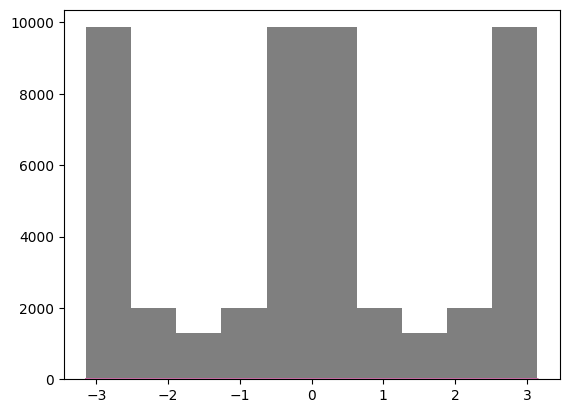

In [49]:
def dist_ab(x, a, b, eta):
    a_ = a*np.exp(1j*x)/(1-a*np.exp(1j*x))
    b_ = b*np.exp(1j*x)/(1-b*np.exp(1j*x))
    f1 = 1/(2*np.pi) * (1+ (a_+a_.conjugate()))
    f2 = 1/(2*np.pi) * (1+ (b_+b_.conjugate()))
    f = (1+eta)/2 *f1+ (1-eta)/2 *f2
    return abs(f)

def gen_dist(N,a,b,eta):
    xs = np.linspace(-np.pi,np.pi,50000)
    f_ab = dist_ab(xs,a,b,eta)
    f_ab /=np.sum(f_ab)
    plt.plot(xs,f_ab)
    u = np.linspace(0,1,N,endpoint=False)
    L = np.cumsum(f_ab)
    plt.plot(xs,f_ab)
    idx = np.searchsorted(L,u)
    return xs[idx]
Q1 = 1
Q2 = 0.6
shift =  0.
A1 = np.sqrt(Q1)
A2 = np.sqrt(Q2)
a1 =  A1 *np.exp(0j)
b1 =  -a1
a2 =  A2*np.exp(shift*1j)
b2 =  -a2

def gen_dist(N,a,b,eta):
    xs = np.linspace(-np.pi,np.pi,50000)
    f_ab = dist_ab(xs,a,b,eta)
    f_ab /=np.sum(f_ab)
    plt.plot(xs,f_ab)
    u = np.linspace(0,1,N+2,endpoint=True)[1:-1]
    L = np.cumsum(f_ab)
    plt.plot(xs,f_ab)
    idx = np.searchsorted(L,u)
    return xs[idx]
# plt.hist(xs[idx],bins=100);
# def f_regular_sampling(x,eta1,eta2):
# plt.hist(gen_dist(N,a1,b1,eta1),bins=100)
N = 50000
plt.hist(gen_dist(N,a2,b2,0.8),bins=100)
eta1 = 0
eta2 = 0.
T1 = gen_dist(N,a1,b1,eta1)
T2 = gen_dist(N,a2,b2,eta2)
Theta =  np.r_[T1,T2]
# plt.hist(T1[:N])
plt.hist(Theta[N:])

In [10]:
Theta.shape

(100000,)

In [156]:
0.6*0.1

0.06

In [157]:
np.abs(np.mean(np.exp(1j*T2))),np.abs(np.mean(np.exp(2j*T2)))

(5.983515285449812e-05, 0.6000237879991505)

In [2]:
N = 1000
eta1 = 0.1
eta2 = 0.0
Theta = get_m1_m2(N,eta1,eta2)

0.5984726435182067 -1.4247122105693724e-16


In [ ]:
A1 = 1
A2 = np.sqrt(0.6)
shift = 0.0 * np.pi

a1 =  A1 *np.exp(0j)
b1 =  a1 * np.exp(np.pi*1j)
c1 = a1**2
a2 =  A2*np.exp(shift*1.0j)
b2 =  a2* np.exp(np.pi*1j)
c2 = a2**2

Zs = RK4(dZ2_dt,np.array([a1.real,a1.imag,b1.real,b1.imag,c1.real,c1.imag,a2.real,a2.imag,b2.real,b2.imag,c2.real,c2.imag]),t,args=(alpha,beta,eta1,eta2))#[::1000]
a1s,b1s,c1s,a2s,b2s,c2s = to_complex2(Zs)

RZ1 = 1/2 * (np.conj(a1s)+np.conj(b1s)) + eta1/2 * (np.conj(a1s)-np.conj(b1s))
QZ1 = 1/2 * (np.conj(a1s)**2+np.conj(b1s)**2) + eta1/2 * (np.conj(a1s)**2-np.conj(b1s)**2)
RZ2 = 1/2 * (np.conj(a2s)+np.conj(b2s)) + eta2/2 * (np.conj(a2s)-np.conj(b2s))
QZ2 = 1/2 * (np.conj(a2s)**2+np.conj(b2s)**2) + eta2/2 * (np.conj(a2s)**2-np.conj(b2s)**2)

R1s = np.abs(RZ1)
R2s = np.abs(RZ2)
Q1s = np.abs(QZ1)
Q2s = np.abs(QZ2)

In [6]:
from numba import jit
from scipy import stats
@jit(nopython=True)
def get_ZE12(Etheta):
    ''' get theta and return r and theta'''
    E1 = Etheta
    E2 = E1**2
    Z1,Z2 = np.mean(E1),np.mean(E2)
    return Z1,Z2
@jit(nopython=True)
def RK4_ZZ(f, y0, t, args=()):
    n = len(t)
    y = np.zeros((n, len(y0)))
    Etheta = np.exp(1j*y0)
    Na = args[0]
    EA,EB = Etheta[:Na],Etheta[Na:]
    Z1a,Z2a = get_ZE12(EA)
    Z1b,Z2b = get_ZE12(EB)
    Z1as = np.zeros(n,dtype=np.complex64)
    Z1bs = np.zeros(n,dtype=np.complex64)
    Z2as = np.zeros(n,dtype=np.complex64)
    Z2bs = np.zeros(n,dtype=np.complex64)

    Z1as[0] = Z1a
    Z2as[0] = Z2a
    Z1bs[0] = Z1b
    Z2bs[0] = Z2b
    
    y[0] = y0
    
    for i in range(n - 1):
        h = t[i + 1] - t[i]
        k1,Z1a,Z1b,Z2a,Z2b = f(y[i], t[i], *args)
        k2,_,_,_,_ = f(y[i] + k1 * h / 2.0, t[i] + h / 2.0, *args)
        k3,_,_,_,_ = f(y[i] + k2 * h / 2.0, t[i] + h / 2.0, *args)
        k4,_,_,_,_ = f(y[i] + k3 * h, t[i] + h, *args)
        y[i + 1] = y[i] + (h / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)
        Z1as[i+1],Z1bs[i+1],Z2as[i+1],Z2bs[i+1] = Z1a,Z1b,Z2a,Z2b
    return y,(Z1as,Z1bs,Z2as,Z2bs)

In [17]:
def dist_ab(x, a, b, eta):
    a_exp = a * np.exp(1j * x)
    b_exp = b * np.exp(1j * x)
    a_ = np.where(a_exp == 1, np.inf, a_exp / (1 - a_exp))
    b_ = np.where(b_exp == 1, np.inf, b_exp / (1 - b_exp))
    f1 = 1 / (2 * np.pi) * (1 + (a_ + a_.conjugate()))
    f2 = 1 / (2 * np.pi) * (1 + (b_ + b_.conjugate()))
    f = (1 + eta) / 2 * f1 + (1 - eta) / 2 * f2
    return abs(f)


def gen_dist(N, a, b, eta):
    xs = np.linspace(-np.pi, np.pi, 50000)
    f_ab = dist_ab(xs, a, b, eta)
    f_ab /= np.sum(f_ab)
    u = np.linspace(0, 1, N + 2, endpoint=True)[1:-1]
    L = np.cumsum(f_ab)
    idx = np.searchsorted(L, u)
    return xs[idx]


@jit(nopython=True)
def Kuramoto_MF_CHIMERA(Theta, t, Na, Nb, beta, alpha, K):
    dtheta = np.zeros(Na + Nb)

    Etheta = np.exp(1j * Theta)
    EA, EB = Etheta[:Na], Etheta[Na:]
    Z1a, Z2a = get_ZE12(EA)
    Z1b, Z2b = get_ZE12(EB)
    A = np.exp(-1j * alpha)
    EA, EB = np.conjugate(EA), np.conjugate(EB)
    ZZa = K * (Z1a + beta * Z1b)
    ZZb = K * (Z1b + beta * Z1a)
    dtheta[:Na] = ((A * (ZZa ** 2)) * EA * EA).imag
    dtheta[Na:] = ((A * (ZZb ** 2)) * EB * EB).imag
    return dtheta, Z1a, Z1b, Z2a, Z2b


def get_R_simul_wf(N, Q1, Q2, eta1, eta2, alpha, beta, shift=0, t_end=5000):
    N1 = N2 = N
    A1 = np.sqrt(Q1)
    A2 = np.sqrt(Q2)
    a1 = A1 * np.exp(0j)
    b1 = -a1
    a2 = A2 * np.exp(shift * 1j)
    b2 = -a2
    T1 = gen_dist(N, a1, b1, eta1)
    T2 = gen_dist(N, a2, b2, eta2)
    Theta = np.c_[T1, T2]
    t = np.arange(0, t_end, 0.1)
    thetas, (Z1as, Z1bs, Z2as, Z2bs) = RK4_ZZ(Kuramoto_MF_CHIMERA, Theta.copy(), t, args=(N1, N2, beta, alpha, 1))
    R1_S = np.abs(Z1as)
    R2_S = np.abs(Z1bs)
    Q1_S = np.abs(Z2as)
    Q2_S = np.abs(Z2bs)
    return R1_S, R2_S, Q1_S, Q2_S, t



R1_s, R2_s, Q1_s, Q2_s, t = get_R_simul_wf(N, 1., 0.6, alpha=alpha, beta=beta, eta1=0.1, eta2=eta2, t_end=10000)

ZeroDivisionError: complex division by zero

In [16]:
alpha,beta,eta1,eta2

(1.2, 0.5, 0, 0.0)

In [4]:
Peak_0_N = int((1/2 *(1 + eta1))*N)
Peak_pi_N = N - Peak_0_N
theta1 = np.r_[np.zeros(Peak_0_N),np.pi*np.ones(Peak_pi_N)]